In [2]:
!pip install --quiet optuna

     |████████████████████████████████| 302 kB 8.8 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 164 kB 50.1 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 141 kB 50.5 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 111 kB 58.8 MB/s 


In [3]:
# Load the Module
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
import optuna
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Load the Dataset
deal = pd.read_csv('/content/drive/MyDrive/데청캠_인바디/ZohoCRM_Dataset/deal_closed_prediction_data.csv')

print(deal)

X = deal[['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry']]
y = deal[['Stage']]

print(y.value_counts())

# Min-Max Scaling
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X) 
scaled = scaler.transform(X) 
scaled_X = pd.DataFrame(scaled,columns=['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry'])


      Year  Month  Day  LeadSource    Territory       Industry  Stage
0     2017      2    7    0.000458    50.000000  132320.620804      0
1     2017      2    7    0.000458    50.000000  132320.620804      0
2     2017      2    7    0.000458  3430.305858  132320.620804      1
3     2017      2    7    0.000458  1394.639984   61963.087644      1
4     2017      2   14    0.000458    50.000000  132320.620804      1
...    ...    ...  ...         ...          ...            ...    ...
2136  2021      7   24   32.692308   645.756033    1430.564418      0
2137  2021      7   26   25.000000   645.756033    1430.564418      0
2138  2021      7   26   25.000000  1014.059096    2727.317659      0
2139  2021      7   26   40.384615   645.756033    2727.317659      0
2140  2021      7   26   32.692308   645.756033    1073.495543      0

[2141 rows x 7 columns]
Stage
0        1212
1         929
dtype: int64


In [34]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X , y, test_size=0.3, random_state=1)

print(X_train.shape)
print(y_test.shape)

(1498, 6)
(643, 1)


In [23]:
import sklearn
from sklearn.model_selection import cross_val_score, cross_validate
def objective(trial) :

    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 1000),
                'max_depth':trial.suggest_int('max_depth', 2, 25),
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 10),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 10),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                'gamma':trial.suggest_int('gamma', 0, 10),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
                'nthread' : -1,
                'objective': 'binary:logistic',
                'booster': 'gbtree'
            }
    
    model = XGBClassifier(**param)
    
    return sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 50)

trial = study.best_trial

# Accuracy of Train :  91.52202937249666 %
# Accuracy: 0.8551215161649944
# Best hyperparameters: {'n_estimators': 197, 'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 4, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.13600488397558672, 'colsample_bytree': 0.71}
# Accuracy: 0.8591326644370122
# Best hyperparameters: {'n_estimators': 952, 'max_depth': 18, 'reg_alpha': 9, 'reg_lambda': 0, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.0068878719282245305}
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-08-27 16:24:38,078] A new study created in memory with name: no-name-d72edac9-3493-4573-a0f3-425569ce0633
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[I 2021-08-27 16:24:43,695] Trial 0 finished with value: 0.851799331103679 and parameters: {'n_estimators': 803, 'max_depth': 21, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.08557308460686738}. Best is trial 0 with value: 0.851799331103679.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when 

Accuracy: 0.8591326644370122
Best hyperparameters: {'n_estimators': 952, 'max_depth': 18, 'reg_alpha': 9, 'reg_lambda': 0, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.0068878719282245305}


In [35]:
clf = XGBClassifier(n_estimators=300, max_depth=7, reg_alpha=6, reg_lambda=1.2, gamma=1,learning_rate=0.1)
clf.fit(X_train,y_train)
pred_y = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [36]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# 0.8740
# 0.8756
# 0.8616
# 0.8600
get_clf_eval(y_test, pred_y)

오차행렬:
 [[332  34]
 [ 55 222]]

정확도: 0.8616
정밀도: 0.8672
재현율: 0.8014
F1: 0.8330
AUC: 0.8543


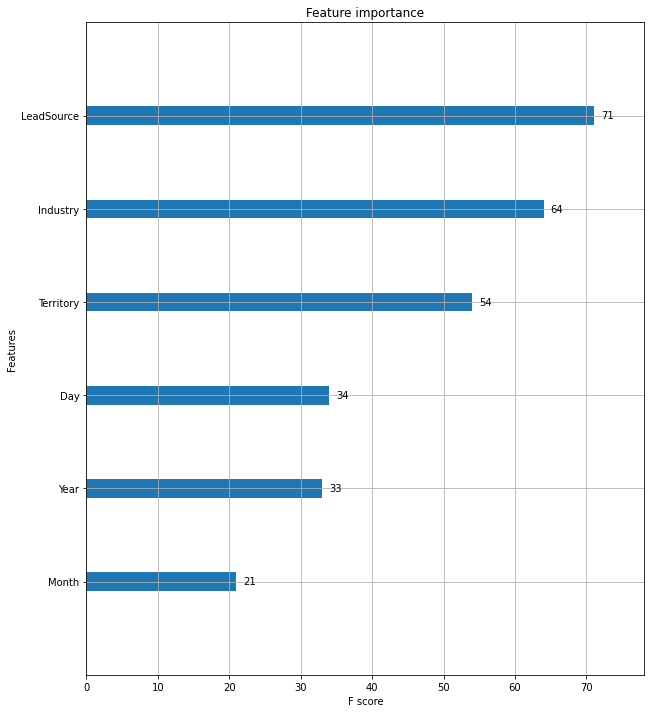

In [28]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(clf, ax=ax)